<a href="https://colab.research.google.com/github/Yash2019-ystg/conatus-projects/blob/master/height_weight.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files                     #uploading cse file 
uploaded = files.upload()

Saving 500_Person_Gender_Height_Weight_Index.csv to 500_Person_Gender_Height_Weight_Index.csv


In [ ]:
import io                                                      
import pandas as pd  
import numpy as np
                                               
df = pd.read_csv(io.BytesIO(uploaded['500_Person_Gender_Height_Weight_Index.csv']))             #reading csv file via pandas
df = df.reindex(np.random.permutation(df.index))
df.head(5)

,Gender,Height,Weight,Index
42,Male,157,56,2
11,Female,159,80,4
29,Male,179,152,5
445,Male,159,140,5
353,Male,184,153,5


In [ ]:
mx = df[df.Gender == 'Male']
mx.drop(["Gender"] , axis = 1 , inplace = True)
mx.head(5)

my = mx.pop("Weight")



/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4169: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


<function matplotlib.pyplot.show>

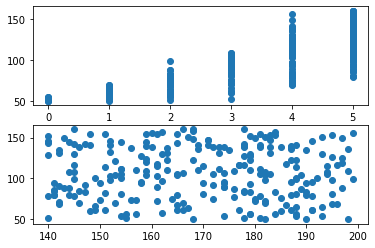

In [ ]:
from matplotlib import pyplot as plt
plt.subplot(211)
plt.scatter(mx["Index"],my)
plt.subplot(212)
plt.scatter(mx["Height"],my)
plt.show

for males

In [ ]:
from sklearn.preprocessing import normalize
mx = normalize(mx, norm='l2',axis=1, copy=True, return_norm=False)

In [ ]:
from sklearn.model_selection import train_test_split
mx_train, mx_test, my_train, my_test = train_test_split(mx,my , test_size = 0.2, random_state=0)

In [ ]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(mx_train,my_train)

y_pred = regressor.predict(mx_test)

from sklearn.metrics import r2_score
r2 = r2_score(my_test, y_pred)
print(r2*100,"%")

85.85742858312028 %


For Females




In [ ]:
import io                                                      
import pandas as pd  
import numpy as np
                                               
df = pd.read_csv(io.BytesIO(uploaded['500_Person_Gender_Height_Weight_Index.csv']))             #reading csv file via pandas
df = df.reindex(np.random.permutation(df.index))
df.head(5)

In [ ]:
fx = df[df.Gender == 'Female']
fx.drop(["Gender"] , axis = 1 , inplace = True)
fx.head(5)

fy = fx.pop("Weight")

In [ ]:
from sklearn.preprocessing import normalize
mx = normalize(fx, norm='l2',axis=0, copy=True, return_norm=False)

In [ ]:
from sklearn.model_selection import train_test_split
fx_train, fx_test, fy_train, fy_test = train_test_split(fx,fy , test_size = 0.2, random_state=0)

In [ ]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(fx_train,fy_train)

y_pred = regressor.predict(fx_test)

from sklearn.metrics import r2_score
r2 = r2_score(fy_test, y_pred)
print(r2*100,"%")

80.22842322110407 %


For Both

In [ ]:
import io                                                      
import pandas as pd  
import numpy as np
                                               
df = pd.read_csv(io.BytesIO(uploaded['500_Person_Gender_Height_Weight_Index.csv']))             #reading csv file via pandas
df = df.reindex(np.random.permutation(df.index))
df.head(5)

,Gender,Height,Weight,Index
1,Male,189,87,2
53,Male,172,105,4
405,Male,148,141,5
30,Male,153,121,5
386,Male,146,138,5


In [ ]:
x = df.iloc[: , [0,1,3]  ]
y = df.iloc[: , 2  ]

In [ ]:
z = x.pop('Gender')
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
z = le.fit_transform(z)

x.insert(0,"Gender",z)

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y , test_size = 0.2, random_state=0)

In [ ]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(x_train,y_train)

y_pred = regressor.predict(x_test)
#print(y_pred)
#print(y_test)

from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)
print(r2*100,"%")

76.74506662224705 %
